In [32]:
# Skript für die .CSV der GT-Daten


import os
import pandas as pd
from collections import Counter

# Verzeichnis mit den Ground-Truth-Dateien
gt_folder = r"C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\01. Abschluss\Abschluss_Sortiert\data\test"

# Mapping der Ground-Truth-Zahlen auf die Kategorien
gt_category_map = {
    0: 'car',
    1: 'entrances in houses',
    2: 'marked parking space',
    3: 'marked parking space road',
    4: 'moving cars',
    5: 'parked roadside',
    6: 'unparked roadside'
}

# Ergebnisliste für den DataFrame
results = []

# Durchlaufen des Ground-Truth-Ordners
for gt_file in os.listdir(gt_folder):
    if gt_file.endswith(".txt"):
        # Bild-ID (Dateiname ohne Endung)
        image_id = os.path.splitext(gt_file)[0]
        
        # Pfad zur Ground-Truth-Datei
        gt_path = os.path.join(gt_folder, gt_file)
        
        # Ground-Truth-Daten laden
        with open(gt_path, 'r') as gf:
            gt_data = gf.readlines()
        
        # Extrahieren der ersten Zahl jeder Zeile (die Kategorien 0-6)
        category_ids = [int(line.split()[0]) for line in gt_data if line.split()[0].isdigit()]
        
        # Zählen der Kategorien anhand der Zahlen 0-6
        gt_counts = Counter(category_ids)
        
        # Initialisieren der Ergebniszeile für dieses Bild
        result = {"Bild-ID": image_id}
        
        # Die Anzahl der Vorkommen jeder Kategorie in die Ergebniszeile einfügen
        for category_id, category_name in gt_category_map.items():
            result[f"Anzahl {category_name}"] = gt_counts.get(category_id, 0)
        
        results.append(result)

# DataFrame erstellen
df = pd.DataFrame(results)

# CSV-Datei speichern
output_csv = 'GT_Abschluss.csv'
df.to_csv(output_csv, index=False, sep=';')  # Speichern mit Semikolon als Trennzeichen

print(f"Tabelle wurde erstellt und in {output_csv} gespeichert.")


Tabelle wurde erstellt und in GT_Abschluss.csv gespeichert.


In [33]:
# Skrpit für das kombinieren der GT-Daten.csv und der predictions-Daten.csv 

import pandas as pd

# Lade die CSV-Dateien
ground_truth_df = pd.read_csv(r"C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\01. Abschluss\GT_Abschluss.csv", delimiter=';')
predictions_df = pd.read_csv(r"C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\01. Abschluss\AbschlussPrediction.csv", delimiter=';')

# Bereinige die predictions CSV, um nur die relevanten Spalten zu behalten
predictions_cleaned_df = predictions_df.iloc[:, :8]
predictions_cleaned_df.columns = [
    "Bild-ID", "Anzahl car (Model)", "Anzahl entrances in houses (Model)",
    "Anzahl marked parking space (Model)", "Anzahl marked parking space road (Model)",
    "Anzahl moving cars (Model)", "Anzahl parked roadside (Model)",
    "Anzahl unparked roadside (Model)"
]

# Kombiniere die beiden DataFrames auf Basis der Bild-ID
combined_df = pd.merge(ground_truth_df, predictions_cleaned_df, on="Bild-ID")

# Speichere das Ergebnis in einer neuen CSV-Datei
combined_df.to_csv('Abschluss_combined_ground_truth_predictions.csv', index=False)

# Optional: Zeige die ersten paar Zeilen des kombinierten DataFrames an
print(combined_df.head())


                                             Bild-ID  Anzahl car  \
0  0090b3ce-512816_5401562_Base_A62_Luftbild_2021...           5   
1  00a438c1-511745_5401489_Base_A62_Luftbild_2021...           3   
2  0334bf5e-511648_5401440_Base_A62_Luftbild_2021...           0   
3  0385177f-511794_5402316_Base_A62_Luftbild_2021...           8   
4  03b31268-511697_5403094_Base_A62_Luftbild_2021...           1   

   Anzahl entrances in houses  Anzahl marked parking space  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   Anzahl marked parking space road  Anzahl moving cars  \
0                                 0                   0   
1                                 0                   0   
2                                 0      

In [35]:
#Statistische Analyse, Vergleich der GT, und Predic. - Daten 
#erst in der csv Spalten trennung durch ',' durchführen !!!! ohne kommt Fehlermeldung 


import pandas as pd
import numpy as np

# Daten laden (hier Pfad zu deiner CSV-Datei anpassen) -> combined ground truth predictions
data = pd.read_csv(r"C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\01. Abschluss\Abschluss_combined_ground_truth_predictions.csv", delimiter=';')

# Liste der Kategorien für den Vergleich
categories = [
    'Anzahl car', 'Anzahl entrances in houses', 'Anzahl marked parking space',
    'Anzahl marked parking space road', 'Anzahl moving cars',
    'Anzahl parked roadside', 'Anzahl unparked roadside'
]

# Funktion zur Berechnung von Mittelwert und Standardabweichung
def calculate_mean_std(gt, pred):
    mean_gt = np.mean(gt)
    mean_pred = np.mean(pred)
    std_gt = np.std(gt)
    std_pred = np.std(pred)
    
    return {
        "Mean (GT)": mean_gt,
        "Mean (Pred)": mean_pred,
        "Standard Deviation (GT)": std_gt,
        "Standard Deviation (Pred)": std_pred
    }

# Ergebnisse für jede Kategorie berechnen und anzeigen
results = {}
for category in categories:
    gt_col = category
    pred_col = f'{category} (Model)'
    stats = calculate_mean_std(data[gt_col], data[pred_col])
    results[category] = stats

# Ergebnisse anzeigen
for category, stats in results.items():
    print(f"Category: {category}")
    print(f"  Mean (GT): {stats['Mean (GT)']:.2f}")
    print(f"  Mean (Pred): {stats['Mean (Pred)']:.2f}")
    print(f"  Standard Deviation (GT): {stats['Standard Deviation (GT)']:.2f}")
    print(f"  Standard Deviation (Pred): {stats['Standard Deviation (Pred)']:.2f}")
    print("\n")


Category: Anzahl car
  Mean (GT): 1.75
  Mean (Pred): 2.11
  Standard Deviation (GT): 2.32
  Standard Deviation (Pred): 2.58


Category: Anzahl entrances in houses
  Mean (GT): 0.12
  Mean (Pred): 0.16
  Standard Deviation (GT): 0.36
  Standard Deviation (Pred): 0.46


Category: Anzahl marked parking space
  Mean (GT): 0.35
  Mean (Pred): 0.52
  Standard Deviation (GT): 1.32
  Standard Deviation (Pred): 1.57


Category: Anzahl marked parking space road
  Mean (GT): 0.35
  Mean (Pred): 0.44
  Standard Deviation (GT): 1.03
  Standard Deviation (Pred): 0.95


Category: Anzahl moving cars
  Mean (GT): 0.14
  Mean (Pred): 0.15
  Standard Deviation (GT): 0.54
  Standard Deviation (Pred): 0.55


Category: Anzahl parked roadside
  Mean (GT): 0.72
  Mean (Pred): 0.82
  Standard Deviation (GT): 1.57
  Standard Deviation (Pred): 1.60


Category: Anzahl unparked roadside
  Mean (GT): 0.28
  Mean (Pred): 0.26
  Standard Deviation (GT): 0.88
  Standard Deviation (Pred): 0.74




In [36]:
import pandas as pd
import numpy as np

# Lade die CSV-Datei (ersetze den Pfad mit deinem Dateipfad)
data = pd.read_csv(r"C:\Users\asus\Desktop\SENCE\2. Semester\Projektarbeit 2\01. Abschluss\Abschluss_combined_ground_truth_predictions.csv", delimiter=';')

# Liste der Kategorien für den Vergleich (Ground-Truth und Predictions)
categories = [
    'Anzahl car', 'Anzahl entrances in houses', 'Anzahl marked parking space',
    'Anzahl marked parking space road', 'Anzahl moving cars',
    'Anzahl parked roadside', 'Anzahl unparked roadside'
]

# Funktion zur Berechnung von Mittelwert und Standardabweichung
def calculate_mean_std(gt, pred):
    mean_gt = np.mean(gt)
    mean_pred = np.mean(pred)
    std_gt = np.std(gt)
    std_pred = np.std(pred)
    
    return {
        "Mean (GT)": mean_gt,
        "Mean (Pred)": mean_pred,
        "Standard Deviation (GT)": std_gt,
        "Standard Deviation (Pred)": std_pred
    }

# Ergebnisse für jede Kategorie berechnen und anzeigen
results = {}
for category in categories:
    gt_col = category
    pred_col = f'{category} (Model)'
    stats = calculate_mean_std(data[gt_col], data[pred_col])
    results[category] = stats

# Ergebnisse anzeigen
for category, stats in results.items():
    print(f"Category: {category}")
    print(f"  Mean (GT): {stats['Mean (GT)']:.2f}")
    print(f"  Mean (Pred): {stats['Mean (Pred)']:.2f}")
    print(f"  Standard Deviation (GT): {stats['Standard Deviation (GT)']:.2f}")
    print(f"  Standard Deviation (Pred): {stats['Standard Deviation (Pred)']:.2f}")
    print("\n")


Category: Anzahl car
  Mean (GT): 1.75
  Mean (Pred): 2.11
  Standard Deviation (GT): 2.32
  Standard Deviation (Pred): 2.58


Category: Anzahl entrances in houses
  Mean (GT): 0.12
  Mean (Pred): 0.16
  Standard Deviation (GT): 0.36
  Standard Deviation (Pred): 0.46


Category: Anzahl marked parking space
  Mean (GT): 0.35
  Mean (Pred): 0.52
  Standard Deviation (GT): 1.32
  Standard Deviation (Pred): 1.57


Category: Anzahl marked parking space road
  Mean (GT): 0.35
  Mean (Pred): 0.44
  Standard Deviation (GT): 1.03
  Standard Deviation (Pred): 0.95


Category: Anzahl moving cars
  Mean (GT): 0.14
  Mean (Pred): 0.15
  Standard Deviation (GT): 0.54
  Standard Deviation (Pred): 0.55


Category: Anzahl parked roadside
  Mean (GT): 0.72
  Mean (Pred): 0.82
  Standard Deviation (GT): 1.57
  Standard Deviation (Pred): 1.60


Category: Anzahl unparked roadside
  Mean (GT): 0.28
  Mean (Pred): 0.26
  Standard Deviation (GT): 0.88
  Standard Deviation (Pred): 0.74




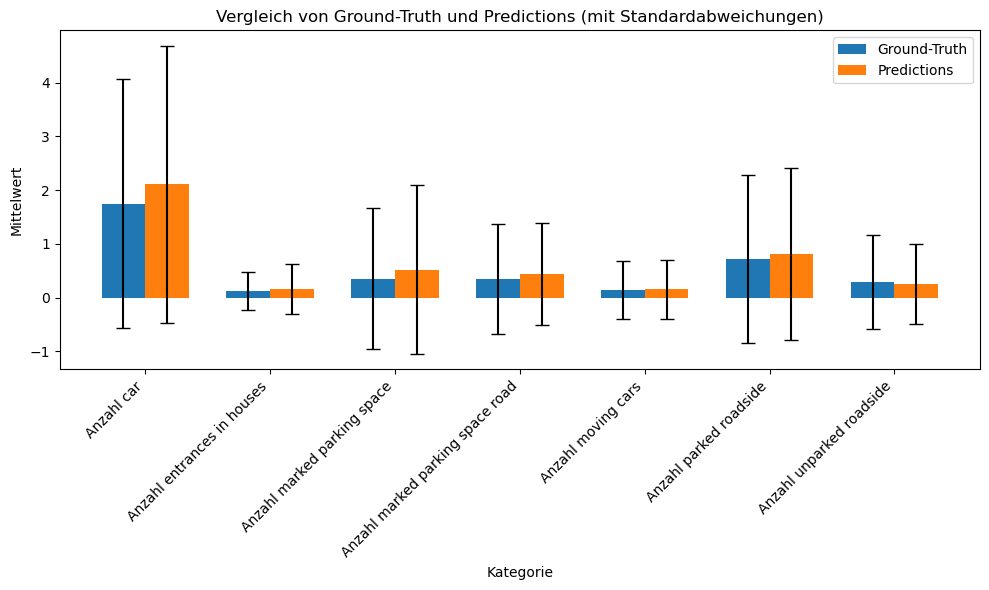

In [37]:
#Diagramm Mittelwert, Standardabweichung 

import matplotlib.pyplot as plt
import numpy as np

# Kategorien (x-Achse) und vorbereitete Mittelwerte/Standardabweichungen
x = np.arange(len(results))  # Anzahl der Kategorien für die x-Achse
width = 0.35  # Breite der Balken

# Extrahiere Mittelwerte und Standardabweichungen aus den berechneten Ergebnissen
means_gt = [results[category]["Mean (GT)"] for category in results]
means_pred = [results[category]["Mean (Pred)"] for category in results]
stds_gt = [results[category]["Standard Deviation (GT)"] for category in results]
stds_pred = [results[category]["Standard Deviation (Pred)"] for category in results]

# Erstelle das Balkendiagramm mit Fehlerbalken
fig, ax = plt.subplots(figsize=(10, 6))

# Balken für Ground-Truth (GT) und Predictions (Model)
bars_gt = ax.bar(x - width/2, means_gt, width, yerr=stds_gt, label='Ground-Truth', capsize=5)
bars_pred = ax.bar(x + width/2, means_pred, width, yerr=stds_pred, label='Predictions', capsize=5)

# Achsen und Titel
ax.set_xlabel('Kategorie')
ax.set_ylabel('Mittelwert')
ax.set_title('Vergleich von Ground-Truth und Predictions (mit Standardabweichungen)')
ax.set_xticks(x)
ax.set_xticklabels(results.keys(), rotation=45, ha="right")
ax.legend()

# Diagramm anzeigen
plt.tight_layout()
plt.show()
